('data testing: ', (400L, 2L))
('iter: ', 1)
('centroid: ', matrix([[ 0.63791644,  1.26463562],
        [ 5.21191768, -1.33694862]]))


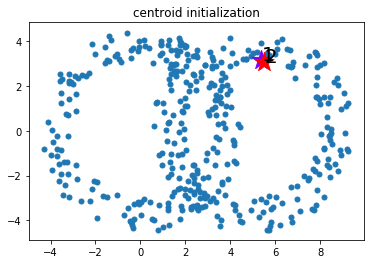

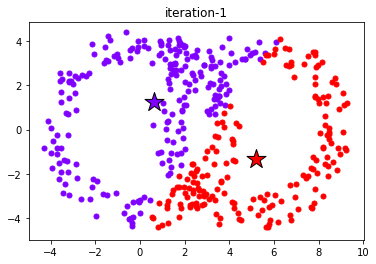

('iter: ', 2)
('centroid: ', matrix([[ 0.44456901,  1.10392535],
        [ 5.28538824, -1.07042032]]))


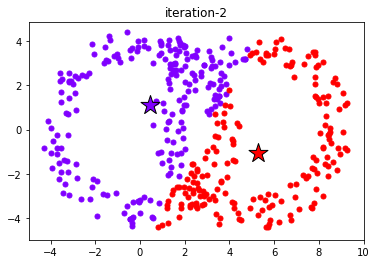

('iter: ', 3)
('centroid: ', matrix([[ 0.29774524,  0.89856381],
        [ 5.37123316, -0.80911   ]]))


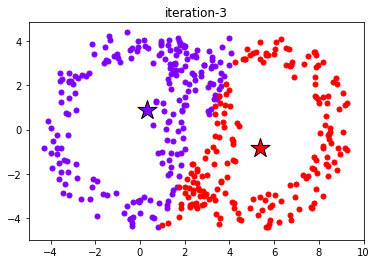

('iter: ', 4)
('centroid: ', matrix([[ 0.11935075,  0.77226816],
        [ 5.32196633, -0.60431357]]))


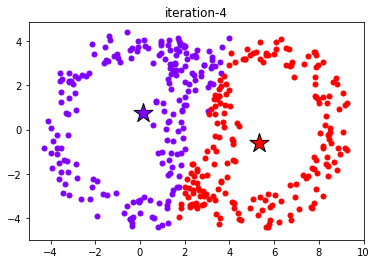

('iter: ', 5)
('centroid: ', matrix([[ 0.04297919,  0.71035127],
        [ 5.29356601, -0.51710197]]))


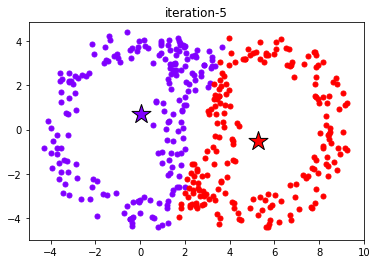

('iter: ', 6)
('centroid: ', matrix([[ 0.02724315,  0.64853452],
        [ 5.30883695, -0.45711232]]))


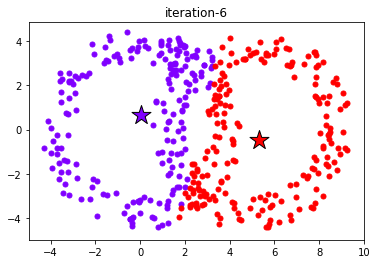

('iter: ', 7)
('centroid: ', matrix([[ 0.03934874,  0.57936935],
        [ 5.34940498, -0.39963682]]))


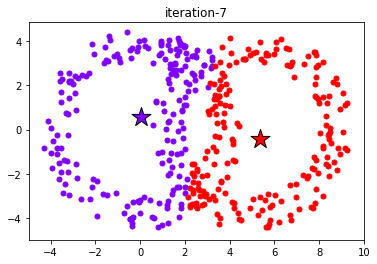

('iter: ', 8)
('centroid: ', matrix([[ 0.07356139,  0.5457198 ],
        [ 5.39495657, -0.38014091]]))


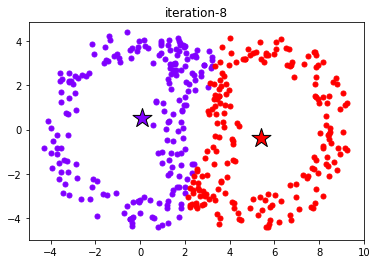

('iter: ', 9)
('centroid: ', matrix([[ 0.09410686,  0.51260049],
        [ 5.42787245, -0.35511735]]))


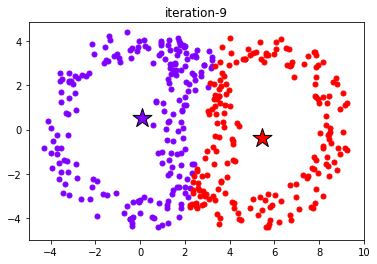

('iter: ', 10)
('centroid: ', matrix([[ 0.10538   ,  0.49987659],
        [ 5.44337385, -0.34619077]]))


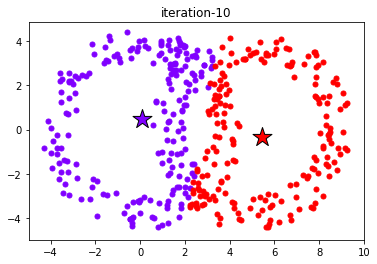

('iter: ', 11)
('centroid: ', matrix([[ 0.11635583,  0.48602184],
        [ 5.45923454, -0.33584021]]))


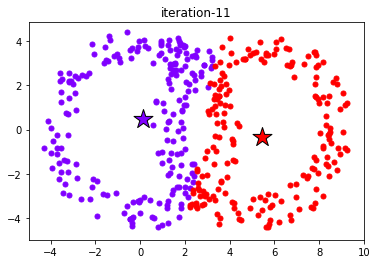

('iter: ', 12)
('centroid: ', matrix([[ 0.13675721,  0.44820192],
        [ 5.49278802, -0.30342969]]))


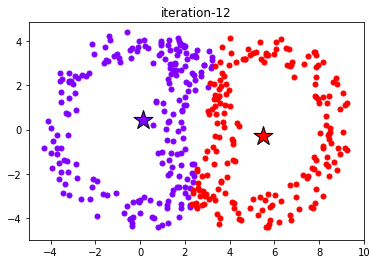

('iter: ', 13)
('centroid: ', matrix([[ 0.19066244,  0.37854695],
        [ 5.57459733, -0.24418717]]))


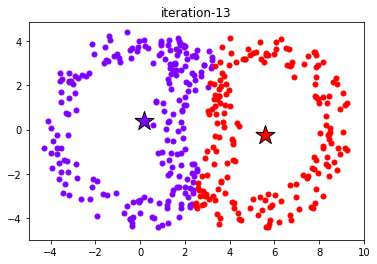

('iter: ', 14)
('centroid: ', matrix([[ 0.20177757,  0.36550607],
        [ 5.59075484, -0.23253118]]))


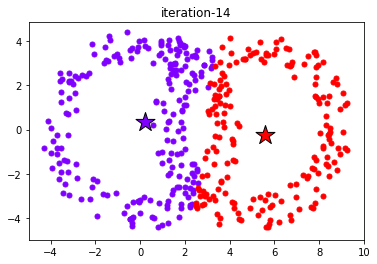

('iter: ', 15)
('centroid: ', matrix([[ 0.23395622,  0.31717235],
        [ 5.64094153, -0.18502131]]))


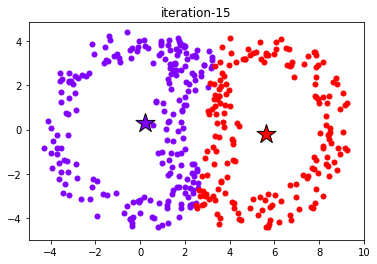

('iter: ', 16)
('centroid: ', matrix([[ 0.23893899,  0.24531972],
        [ 5.66468187, -0.10171538]]))


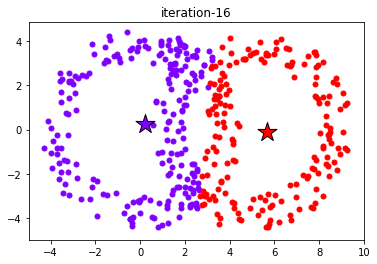

('iter: ', 17)
('centroid: ', matrix([[ 0.23443486,  0.19242156],
        [ 5.67007692, -0.03835385]]))


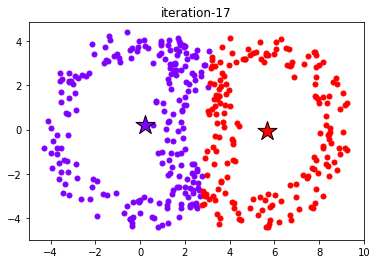

('iter: ', 18)
('centroid: ', matrix([[ 0.24597626,  0.17608767],
        [ 5.68614365, -0.01986575]]))


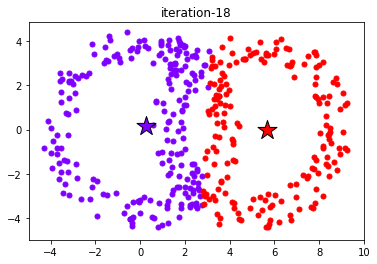

('iter: ', 19)
('centroid: ', matrix([[0.28133919, 0.14206532],
        [5.73372753, 0.01926404]]))


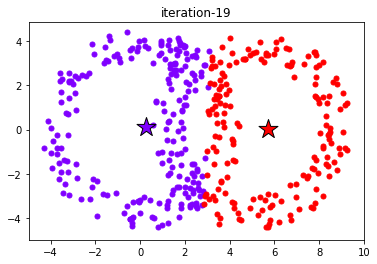

('iter: ', 20)
('centroid: ', matrix([[0.32832345, 0.11092478],
        [5.79804425, 0.05688793]]))


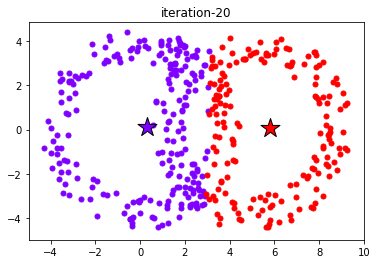

('iter: ', 21)
('centroid: ', matrix([[0.35158114, 0.08809518],
        [5.8308157 , 0.08652209]]))


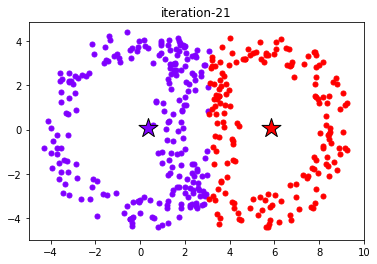

('iter: ', 22)
('centroid: ', matrix([[0.36346856, 0.09087773],
        [5.8469386 , 0.08278655]]))


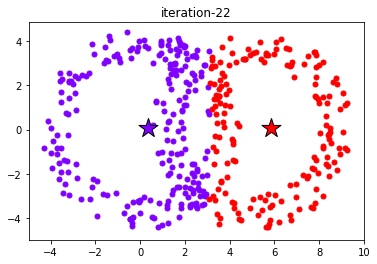

('iter: ', 23)
('centroid: ', matrix([[0.37532957, 0.07688783],
        [5.86314706, 0.10166647]]))


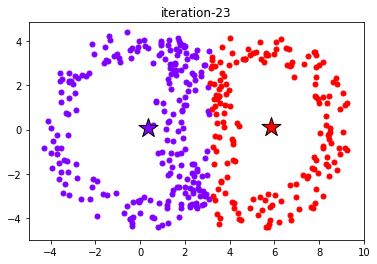

('iter: ', 24)
('centroid: ', matrix([[0.37532957, 0.07688783],
        [5.86314706, 0.10166647]]))


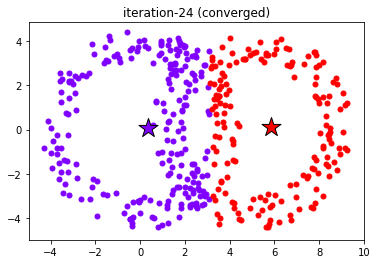

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import time

filePath1 = "test1_data.txt"
filePath2 = "test2_data.txt"
dataTesting1 = np.loadtxt(filePath1, delimiter=" ")
dataTesting2 = np.loadtxt(filePath2, delimiter=" ")

print("data testing: ", dataTesting1.shape)

#define params
k = 2 #numb of clusters
iterationCounter = 0 #clustering iteration counter
input = dataTesting1
initCentroidMethod = "badInit" #options: random, kmeans++, badInit, zeroInit

def initCentroid(dataIn, method, k):
    if (method=="random"):
        result = dataIn[np.random.choice(dataIn.shape[0], k, replace=False)]
    if (method=="kmeans++"):
        euclideanMatrixAllCentroid = np.ndarray(shape=(dataIn.shape[0], 0))
        allCentroid = np.ndarray(shape=(0,dataIn.shape[1]))
        first = dataIn[np.random.choice(dataIn.shape[0], 1, replace=False)]
        allCentroid = np.concatenate((allCentroid, first), axis=0)
        repeatedCent = np.repeat(first, dataIn.shape[0], axis=0)
        deltaMatrix = abs(np.subtract(dataIn, repeatedCent))
        euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
        indexNextCent = (np.argmax(np.matrix(euclideanMatrix)))
        if(k>1):
            for a in range(1,k):
                nextCent = np.matrix(dataIn[np.asscalar(indexNextCent),:])
                allCentroid = np.concatenate((allCentroid, nextCent), axis=0)
                for i in range(0,allCentroid.shape[0]):
                    repeatedCent = np.repeat(allCentroid[i,:], dataIn.shape[0], axis=0)
                    deltaMatrix = abs(np.subtract(dataIn, repeatedCent))
                    euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
                    euclideanMatrixAllCentroid = \
                        np.concatenate((euclideanMatrixAllCentroid, euclideanMatrix), axis=1)
                euclideanFinal = np.min(np.matrix(euclideanMatrixAllCentroid), axis=1)
                indexNextCent = np.argmax(np.matrix(euclideanFinal))
        result = allCentroid
    if (method=="badInit"):
        allCentroid = np.ndarray(shape=(0,dataIn.shape[1]))
        firstIndex = np.random.randint(0,dataIn.shape[0])
        first = np.matrix(dataIn[firstIndex,:])
        dataIn = np.delete(dataIn, firstIndex, 0)
        allCentroid = np.concatenate((allCentroid, first), axis=0)
        repeatedCent = np.repeat(first, dataIn.shape[0], axis=0)
        deltaMatrix = abs(np.subtract(dataIn, repeatedCent))
        euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
        indexNextCent = (np.argmin(np.matrix(euclideanMatrix)))
        if(k>1):
            for a in range(1,k):
                nextCent = np.matrix(dataIn[np.asscalar(indexNextCent),:])
                dataIn = np.delete(dataIn, np.asscalar(indexNextCent), 0)
                euclideanMatrixAllCentroid = np.ndarray(shape=(dataIn.shape[0], 0))
                allCentroid = np.concatenate((allCentroid, nextCent), axis=0)
                for i in range(0,allCentroid.shape[0]):
                    repeatedCent = np.repeat(allCentroid[i,:], dataIn.shape[0], axis=0)
                    deltaMatrix = abs(np.subtract(dataIn, repeatedCent))
                    euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
                    euclideanMatrixAllCentroid = \
                        np.concatenate((euclideanMatrixAllCentroid, euclideanMatrix), axis=1)
                euclideanFinal = np.min(np.matrix(euclideanMatrixAllCentroid), axis=1)
                indexNextCent = np.argmin(np.matrix(euclideanFinal))
        result = allCentroid
    if (method=="zeroInit"):
        result = np.matrix(np.full((k,dataIn.shape[1]),0))

    color = iter(cm.rainbow(np.linspace(0, 1, k)))
    plt.figure("centroid initialization")
    plt.title("centroid initialization")
    plt.scatter(dataIn[:, 0], dataIn[:, 1], marker=".", s=100)
    for i in range(0,k):
        col = next(color)
        plt.scatter((result[i, 0]), (result[i, 1]), marker="*", s=400, c=col)
        plt.text((result[i, 0]), (result[i, 1]), str(i+1), fontsize=20)
    return result

def plotClusterResult(listClusterMembers, centroid, iteration, converged):
    n = listClusterMembers.__len__()
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    plt.figure("result")
    plt.clf()
    plt.title("iteration-" + iteration)
    for i in range(n):
        col = next(color)
        memberCluster = np.asmatrix(listClusterMembers[i])
        plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]), marker=".", s=100, c=col)
        plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker="*", s=400, c=col, edgecolors="black")
    if(converged == 0):
        plt.ion()
        plt.show()
        plt.pause(0.1)
    if (converged == 1):
        plt.show(block=True)

def kMeans(data, centroidInit):
    nCluster = centroidInit.shape[0]
    #looping until converged
    global iterationCounter
    centroidInit = np.matrix(centroidInit)
    while(True):
        iterationCounter +=1
        euclideanMatrixAllCluster = np.ndarray(shape=(data.shape[0], 0))
        #assign data to cluster whose centroid is the closest one
        for i in range(0, nCluster):
            centroidRepeated = np.repeat(centroidInit[i,:], data.shape[0], axis=0)
            deltaMatrix = abs(np.subtract(data,centroidRepeated))
            euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
            euclideanMatrixAllCluster = \
                np.concatenate((euclideanMatrixAllCluster, euclideanMatrix), axis=1)
        clusterMatrix = np.ravel(np.argmin(np.matrix(euclideanMatrixAllCluster), axis=1))
        listClusterMember = [[] for i in range(k)]
        for i in range(0, data.shape[0]):#assign data to cluster regarding cluster matrix
            listClusterMember[np.asscalar(clusterMatrix[i])].append(data[i,:])
        #calculate new centroid
        newCentroid = np.ndarray(shape=(0, centroidInit.shape[1]))
        for i in range(0,nCluster):
            memberCluster = np.asmatrix(listClusterMember[i])
            centroidCluster = memberCluster.mean(axis=0)
            newCentroid = np.concatenate((newCentroid, centroidCluster), axis=0)
        #break when converged
        print("iter: ", iterationCounter)
        print("centroid: ", newCentroid)
        if((centroidInit == newCentroid).all()):
            break
        # update new centroid
        centroidInit = newCentroid
        plotClusterResult(listClusterMember, centroidInit, str(iterationCounter), 0)
        time.sleep(1)
    return listClusterMember, centroidInit

centroidInit = initCentroid(input, initCentroidMethod, k)
clusterResults, centroid = kMeans(input, centroidInit)
plotClusterResult(clusterResults, centroid, str(iterationCounter) + " (converged)", 1)
